In [33]:
# для импорта функций и классов из папки с лекциями нам нужно добавить путь в файлу с лекцией
import sys
sys.path.append('../../../bin') # поднимаемся на три папки вверх и переходим в папку bin
# from Lection_008 import Curve, SetOfCurves
from Lection_006 import Stress_strain, Flow_curve

import numpy as np
import pandas as pd



In [34]:
# Считываем имена листов из файла с данными
sheet_names = pd.ExcelFile('data.xlsx').sheet_names
sheet_names

['Лист1', '3_20', '4_200', '5_215', '6_230', '7_245', '8_250', '9_270']

In [35]:
# Посмотрим на струкруту листа
exp_4_200 = pd.read_excel('data.xlsx', sheet_name='4_200', header = None)
exp_4_200.head(30)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Файл,C:\Testsystems\Metal\Tests\Зульфия\4\4\4.001.rez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Вид испытания,сжатие,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Дата,16 Октябрь 2025 г.,14:33:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Скорость [мм/мин],10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Форма,Круглый,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Начальные размеры: [мм],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Диаметр,Толщина,Ширина,Длина,База,Расч.дл,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,NaN,NaN,25,11,25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Размеры после испытания: [мм],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,H0,D0,V,Hк,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# первый лист нам не понадобится, удаляем его
sheet_names.remove('Лист1')

In [37]:
# прочитаем данные
# создадим словарь куда будем записывать данные для каждого образца
exp_data = {}

for item in sheet_names: # итерируем по списку с именами листов
    df =  pd.read_excel('data.xlsx', sheet_name=item, header = None) # для каждого листа по очереди создаем pandas dataframe (еще не проходили)
    stroke = df.iloc[13:, 1].to_numpy() # ход деформарования
    load = df.iloc[13:, 2].to_numpy() # сила деформирования
    temperature = float(item.split('_')[1])   # температура деформирования
    L0 = df.iloc[10, 6] # исходная высота заготовки
    d0 = df.iloc[10, 7] # исходные диаметр заготовки
    Le = df.iloc[10, 9] # конечная высота заготовки
    A0 = (np.pi*d0**2)/4 # исходная площадь попереченого сечения
    # Создаем экземпляр класса Stress_strain (см. в файле 6-й лекции)
    object_stress_strain = Stress_strain (stroke, load, L0, A0, Le)
    # добавляем в него данные по температуре
    object_stress_strain.temperature = temperature
    # посчитаем жесткость машины
    object_stress_strain.get_stifness()
    
    
    # добавляем объект в словарь exp_data
    key = str(int(temperature)) # ключ - температура в формате integer конвертируемая в текст
    exp_data[key] = object_stress_strain
        

In [38]:
# посмотрим значения жесткостей для каждого из опытов
print ('Жесткость машины при температуре испытания')
for key, value in exp_data.items():
    print (f'T = {value.temperature:.0f}: k = {value.k:.2f} Н/мм')

Жесткость машины при температуре испытания
T = 20: k = 187488.28 Н/мм
T = 200: k = 82740.38 Н/мм
T = 215: k = 88516.32 Н/мм
T = 230: k = 87762.08 Н/мм
T = 245: k = 101891.15 Н/мм
T = 250: k = 93369.96 Н/мм
T = 270: k = 77440.07 Н/мм


In [ ]:
# в моем представлении жесткость должна была быть приблизительно одинаковой. Но что-то у нас идет не так, к сожалению.

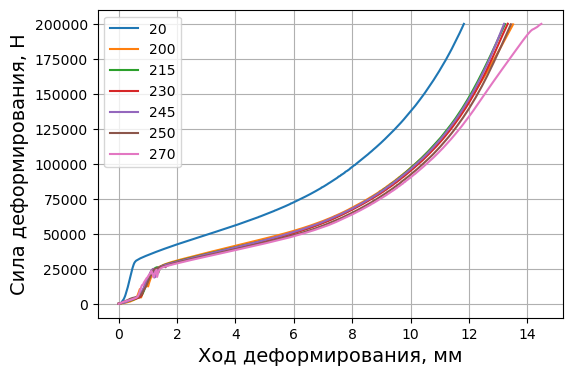

In [39]:
# посмотрим на получившиеся графики сила-перемещение
list_of_strokes = [obj.stroke for obj in exp_data.values()]
list_of_loads = [obj.load for obj in exp_data.values()]
list_of_curve_labels = list(exp_data)
Stress_strain.plot_graphs(list_of_strokes, list_of_loads,  list_of_curve_labels, 'Ход деформирования, мм', 'Сила деформирования, Н')
# как видите я добавил метод plot_graphs в наш базовый класс (см. файл Lection_006.py)

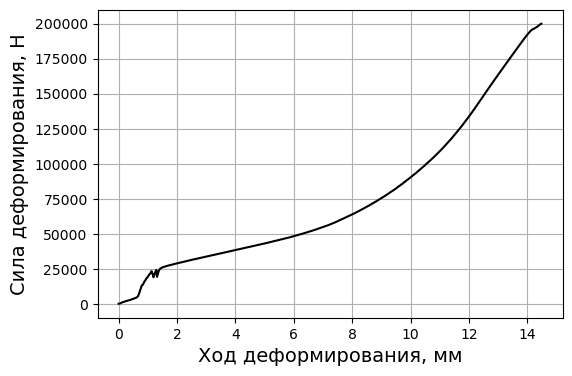

In [40]:
# Посмотрим на график '270' который какие-то артефактные всплески имеет
Stress_strain.plot_graph(exp_data['270'].stroke, exp_data['270'].load, 'Ход деформирования, мм', 'Сила деформирования, Н' )

In [41]:
# сгладим немного график что бы избавиться от этих всплесков  (применим экспонинцеальное сгллаживание)
for key, value in exp_data.items():
    alpha = 0.1  # коэффициент сглаживания (0-1)
    value.y_data = pd.Series(value.y_data).ewm(alpha=alpha).mean() # стандартный метод библиотеки pandas. в numpy его нет к сожалению
    value.y_data = value.y_data.to_numpy() # конвертируем y_data обратно в numpy

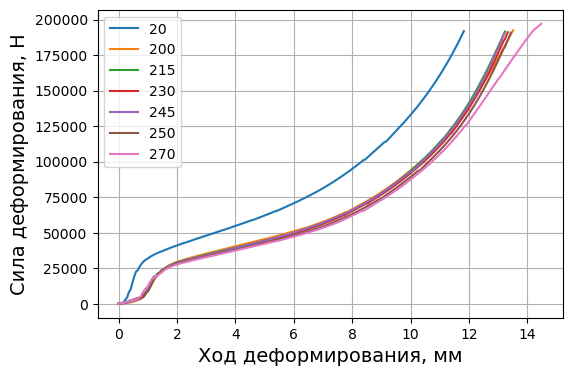

In [42]:
# посмотрим на получившиеся графики сила-перемещение уже без всплесков
list_of_strokes = [obj.stroke for obj in exp_data.values()]
list_of_loads = [obj.load for obj in exp_data.values()]
list_of_curve_labels = list(exp_data)
Stress_strain.plot_graphs(list_of_strokes, list_of_loads,  list_of_curve_labels, 'Ход деформирования, мм', 'Сила деформирования, Н')

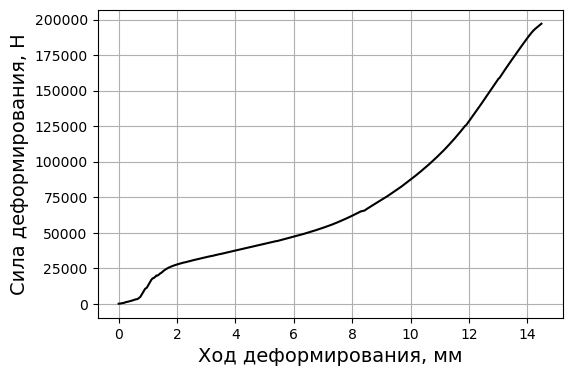

In [43]:
# И на график '270' который больше всплесков не имеет
Stress_strain.plot_graph(exp_data['270'].stroke, exp_data['270'].load, 'Ход деформирования, мм', 'Сила деформирования, Н' )

In [44]:
# теперь для всех графиков посчитаем напряжения и деформации
for key, value in exp_data.items():
    value.get_stress_true()
    value.get_strain_true()

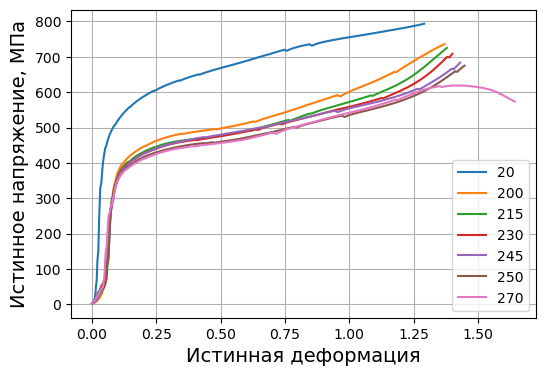

In [45]:
# посмотрим на получившиеся графики истинных напряжений/дефораций
list_of_true_strain = [obj.strain_true for obj in exp_data.values()]
list_of_true_stress = [obj.stress_true for obj in exp_data.values()]
list_of_curve_labels = list(exp_data)
Stress_strain.plot_graphs(list_of_true_strain, list_of_true_stress,  list_of_curve_labels, 'Истинная деформация', 'Истинное напряжение, МПа')

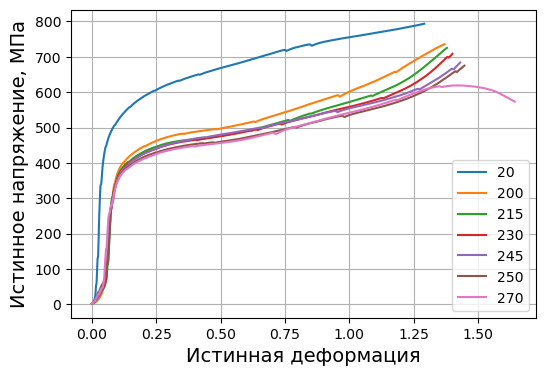

In [46]:
# в 6-ю лекцию я добавил класс Flow_curve. Его задача отделить упругую часть графика от пластической  
flow_data = {} # объекты класса Flow_curve будем записывать в словарь flow_data 
for key, value in exp_data.items():
    flow_curve_obj = Flow_curve (value.strain_true, value.stress_true) # создаем объект класса Flow_curve 
    flow_curve_obj.interpolate_data (num_points=10000,  kind='cubic') # я добавил интерполяцию данных в надержде что так легче будет 
                                         #отделять упругаю от поастической части. Не уверен, что это сильно помогает, но пость будет 
    flow_data[key] = flow_curve_obj
# посмотрим на получившиеся интерполированные кривые (не должны визуально отличаться от изначально заданых)
list_of_strain = [obj.strain_true for obj in flow_data.values()]
list_of_stress = [obj.stress_true for obj in flow_data.values()]
list_of_curve_labels = list(flow_data)
Flow_curve.plot_graphs(list_of_strain, list_of_stress,  list_of_curve_labels, 'Истинная деформация', 'Истинное напряжение, МПа')

In [47]:
# дальше собвтвенно отделяем упругую часть (линейную) от пластической (нелинейной)
# 200.0 МПа- напряжение, ниже которого мы не проверяем линейность, т.к. у нас есть в начале нелинейный участок-артефакт 
for key, value in flow_data.items():
    value.find_plastic_start(200.0, min_points=50) # ищем точку окончания линейной зоны графика (метода смотрите в лекции 006) 
    value.set_flow_curve() # создаем кривую упрочнения
    print(f"σ₀ = {value.flow_curve[0, 1]:.2f} МПа")

σ₀ = 332.38 МПа
σ₀ = 276.66 МПа
σ₀ = 284.18 МПа
σ₀ = 260.23 МПа
σ₀ = 269.34 МПа
σ₀ = 280.55 МПа
σ₀ = 256.66 МПа


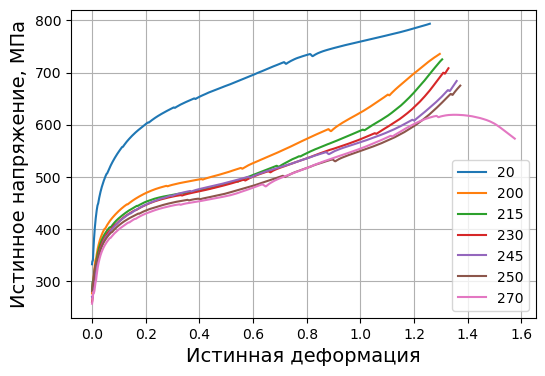

In [48]:
# посмотрим на получившиеся кривые упрочнения
list_of_plastic_strain = [obj.flow_curve[:, 0] for obj in flow_data.values()]
list_of_plastic_stress = [obj.flow_curve[:, 1] for obj in flow_data.values()]
list_of_curve_labels = list(flow_data)
Flow_curve.plot_graphs(list_of_plastic_strain, list_of_plastic_stress,  list_of_curve_labels, 'Истинная деформация', 'Истинное напряжение, МПа')